# CTA200H Mini Project: MW Analogues in cosmological simulations
Author: Nicole Jiang

## Imports: 

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm.notebook import tqdm

## Retrieving EAGLE Galaxy properties:

In [56]:
import eagleSqlTools as sql

username = 'vmv742'
password = 'jeqFXC28'

con = sql.connect(username, password=password)

query="""SELECT MassType_Star as stellar_mass,
            StarFormationRate as SFR
            FROM RefL0100N1504_SubHalo
            WHERE SnapNum = 28"""

data = sql.execute_query(con,query)

A query retrieves columns of data from a table within a database. In this case, the query retrieves the simulated stellar mass and star formation rates of galaxies within a subhalo (table RefL0100N1504_SubHalo) recorded in the EAGLE database, but with a condition. The condition placed on the query is 'SnapNum = 28', meaning that the data retrieved is restricted to the 28th snapshot such that the output data is from a unique moment of time. This is because snapshots in the EAGLE database refer to a certain value of cosmological redshift. 

Because the universe is always expanding, distant objects become more distant with time. Light's wavelength stretches as it travels through the expanding universe, and the stretching is a phenomenon called cosmological redshift. The cosmological redshift of a snapshot indicates how much the universe has expanded since that snapshot (known as the expansion factor) and how far back in time the snapshot is (known as the lookback time). In this case, the 28th snapshot refers to a redshift of z = 0.00, so the simulation is of present day, where we look back in time 0.00 gigayears to when the expansion factor is 1.000. 

If the same condition of 'SnapNum = 28' is applied to different columns of the table, this would mean that the data retrieved would be different properties (columns) but of the same galaxies (rows) in the same subhalo (table) at the same moment in time (SnapNum). 

Plotting the information:

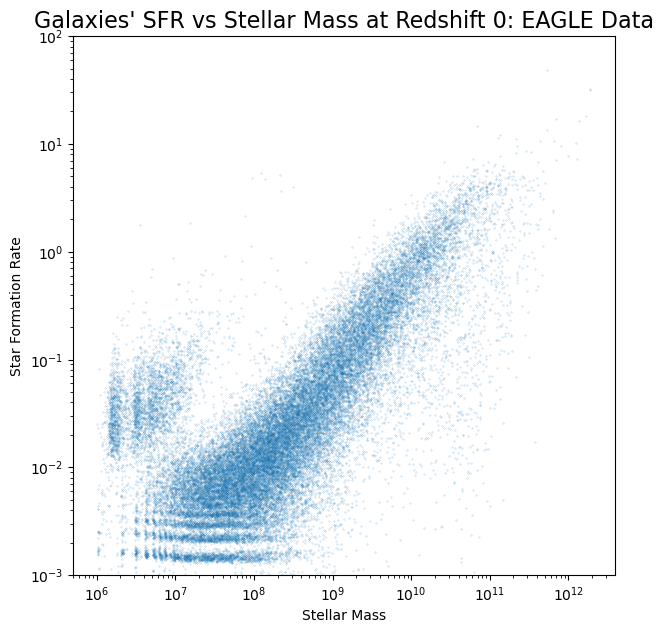

In [58]:
stellar_mass = data['stellar_mass']
SFR = data['SFR']

plt.figure(figsize=(7,7))
plt.scatter(stellar_mass, SFR, s= 0.05, alpha = 0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1e2)
plt.title('Galaxies\' SFR vs Stellar Mass at Redshift 0: EAGLE Data', fontsize=16)
plt.xlabel('Stellar Mass')
plt.ylabel('Star Formation Rate')
plt.show()

Turning this into a 2D histogram... 

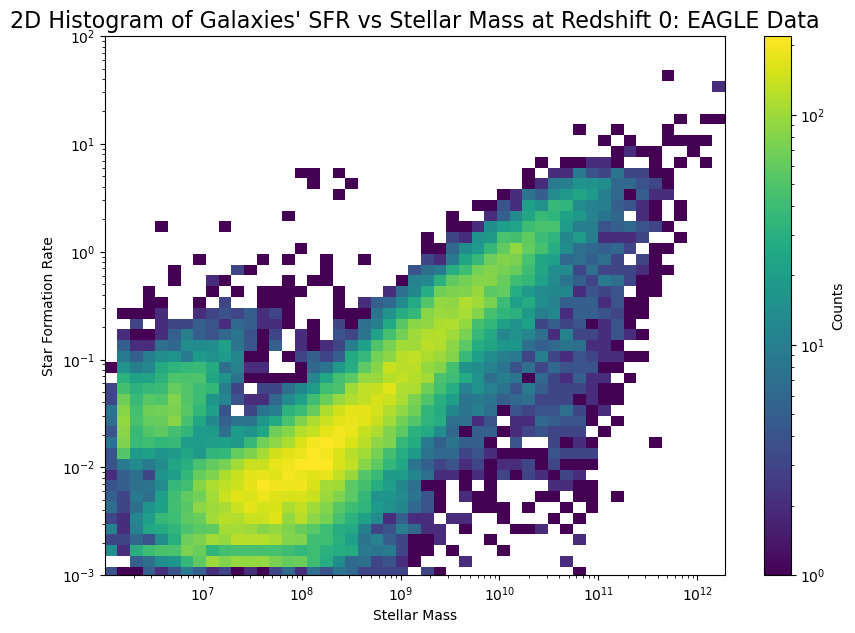

In [60]:
positives = (stellar_mass > 0) & (SFR > 0)
x = stellar_mass[positives]
y = SFR[positives]

x_bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 50)
y_bins = np.logspace(np.log10(y.min()), np.log10(y.max()), 50)

plt.figure(figsize=(10,7))
histo2d = plt.hist2d(x, y, bins=[x_bins, y_bins], norm=LogNorm())

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1e2)
plt.xlabel('Stellar Mass')
plt.ylabel('Star Formation Rate')
plt.title('2D Histogram of Galaxies\' SFR vs Stellar Mass at Redshift 0: EAGLE Data', fontsize=16)
plt.colorbar(histo2d[3], label='Counts')
plt.show()

Number of galaxies: 

In [62]:
print('The number of galaxies in this simulation is ', len(data))

The number of galaxies in this simulation is  2275510


It is evident that the SFR vs Stellar Mass relationship of this plot resembles an increasing, roughly linear trend: as the stellar mass increases, so does the star formation rate. This correlation is known as the galaxy star formation main sequence. The data points scatter around a diagonal line, known as the main sequence. Galaxies that deviate from the main sequence can be grouped as follows:

1. Starbursts
   \
   These galaxies lie above the main sequence and have a higher SFR compared to galaxies on the main sequence with the same stellar mass. This is from forming many stars in short periods of time, called "starburst events". 
2. Green valley
   \
   Located just below the main sequence, these galaxies are transitioning to red and dead. 
3. Red and dead
   \
   This group of galaxies has the lowest SFR and is believed to have been once on the main sequence, but through debatable processes, fell off into the red and dead state. It gets its name because galaxies with new, young stars are hotter and bluer while galaxies with stellar mass but no new stars appear redder. 
   
It is believed that over time, galaxies evolve along the main sequence, but can be pushed upwards, deviating to starbursts, or below, falling through the green valley, quenching (ceasing star formation activity), and becoming red and dead. \
\
In the simulated SFR vs Stellar Mass plot, the starburst galaxies seem to group in vertical stripes while the galaxies deviating below the main sequence form horizontal stripes. This differs from what we would expect from a plot using observed data from nature, which looks more continuous, smooth, and groups are cloud-like instead of stripes. These differing features of the simulated plot are likely due to the simplifications that make the simulations even possible on such a large scale, and efficient. The vertical stripes are likely because in order to keep track of less entities, the simulation groups stars that form in the same region into single particle masses. So the stellar masses of galaxies are grouped in levels instead growing continuously like with real data. Furthermore, another simplification that makes simulations efficient is large timesteps. Larger time steps means less integration steps so faster runtime, but also means the simulation is not continuous. This is another reason for the breaks, and is likely the reason for the horizontal stripes. These simplifications also exist along the main sequence but because the points are denser and more scattered, it is not visible. Additionally, observational studies tend to span more than a single redshift, so data is broader in that sense. 


## Going Deeper into the Simulations: more properties and more snapshots

To access all galaxies found in snapshots after a redshift of z = 0.5, we can change the condition to 'SnapNum <= 28 and SnapNum > 23'. This is because 'after' a redshift of z = 0.5 is a range of 0 <= z < 0.5. According to Appendix C of the EAGLE public release of halo and galaxy catalogues, a redshift of 0 is the 28th snapshot while a redshift of z = 0.5 is the 23rd snapshot. It follows that '0 <= z < 0.5' in terms of snapshot number is '28 <= SnapNum < 23'.

In [66]:
query="""SELECT MassType_Star as stellar_mass,
            StarFormationRate as SFR
            FROM RefL0100N1504_SubHalo
            WHERE SnapNum <= 28 and SnapNum > 23"""

data2 = sql.execute_query(con,query)

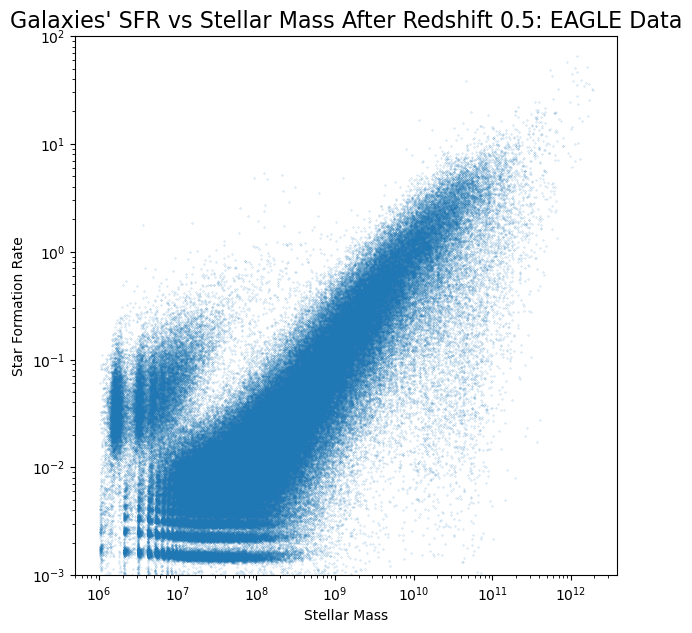

In [144]:
stellar_mass = data2['stellar_mass']
SFR = data2['SFR']

plt.figure(figsize=(7,7))
plt.scatter(stellar_mass, SFR, s=0.05, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1e2)
plt.title('Galaxies\' SFR vs Stellar Mass After Redshift 0.5: EAGLE Data', fontsize=16)
plt.xlabel('Stellar Mass')
plt.ylabel('Star Formation Rate')
plt.show()

Again, turning this into a 2D histogram... 

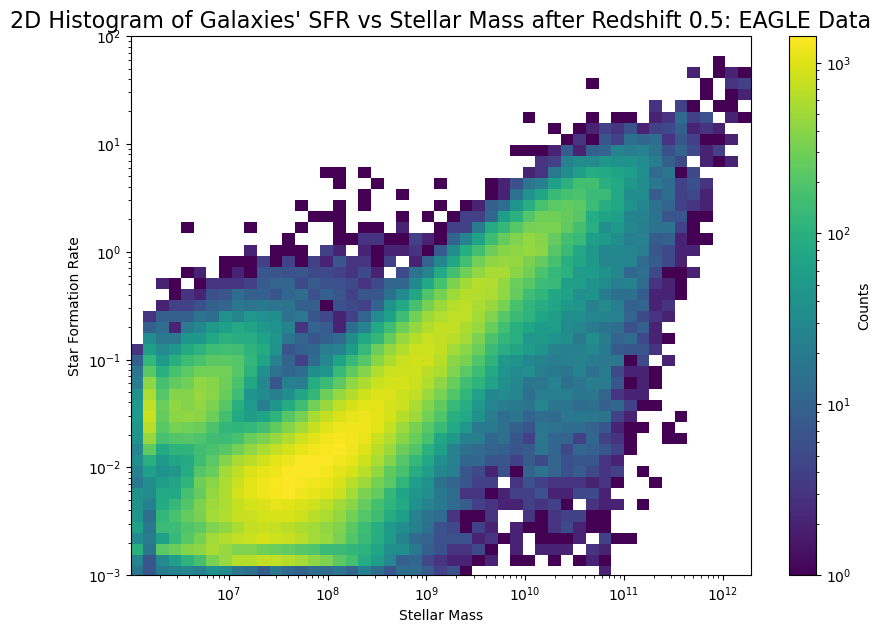

In [69]:
positives = (stellar_mass > 0) & (SFR > 0)
x = stellar_mass[positives]
y = SFR[positives]

x_bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 50)
y_bins = np.logspace(np.log10(y.min()), np.log10(y.max()), 50)

plt.figure(figsize=(10,7))
histo2d = plt.hist2d(x, y, bins=[x_bins, y_bins], norm=LogNorm())

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1e2)
plt.xlabel('Stellar Mass')
plt.ylabel('Star Formation Rate')
plt.title('2D Histogram of Galaxies\' SFR vs Stellar Mass after Redshift 0.5: EAGLE Data', fontsize=16)
plt.colorbar(histo2d[3], label='Counts')
plt.show()

Number of galaxies: 

In [71]:
print('The number of galaxies in this simulation is ', len(data2))

The number of galaxies in this simulation is  11819412


Comparing data from one snapshot at redshift 0 vs data from all snapshots after redshoft 0.5 gives us: 

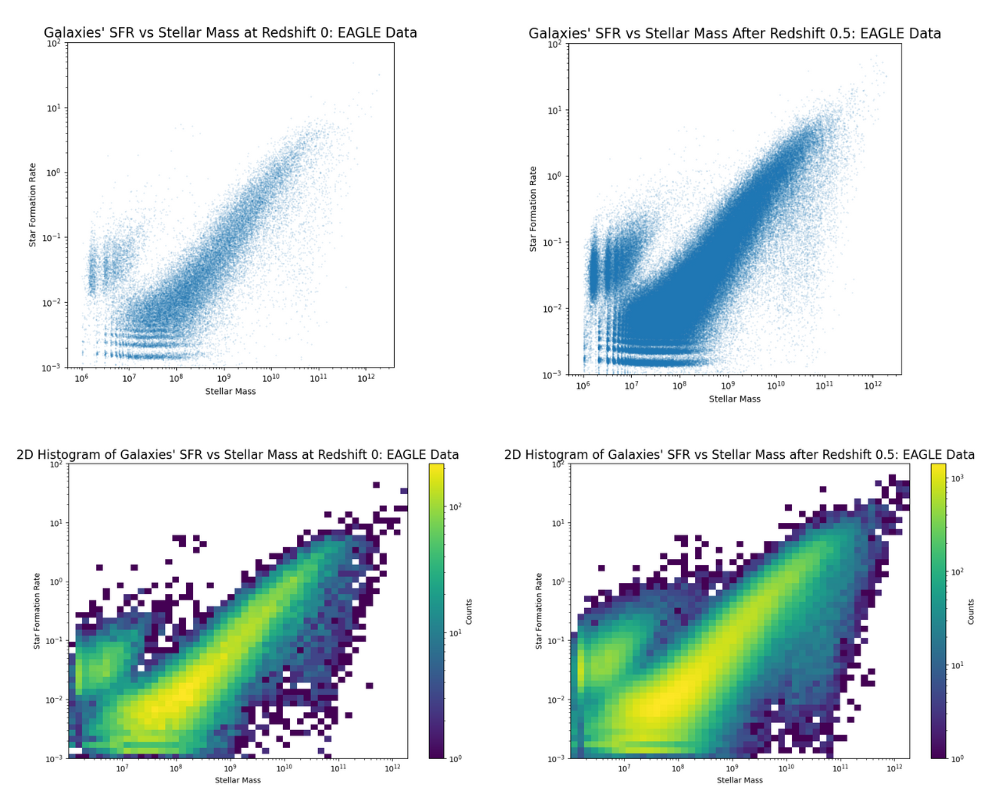

It is clear from the figures that the plot of data after redshift 0.5 is denser everywhere compared to the plot of just redshift 0 (snapshot 28). The redshift 0 plot has 2,275,510 galaxies while the plot showing galaxies after redshift 0.5 has 11,819,412 galaxies. The plot after redshift 0.5 has more galaxies in the output and is therefore more dense and crowded. The distribution is comparatively more scattered, broadening the main sequence. It also reaches a higher SFR and thus the main sequence is steeper. 

A simulation spanning several redshifts is more representitive of the data collected from an observational galaxy survey in real life because the line of sight of an advanced observational instrument can go so far that it can detect distant, redshifted galaxies where the light coming in is actually gigayears old. We don't observe the whole universe at a single instant, since the farther we look the older the information is. 

The maximum redshift that a galaxy survey can see galaxies at depends on the capabilities of the observational instrument at use and the detectability of a distant galaxy. An instrument's sensitivity to luminosity and ability to filter out interfering light decides whether or not it detects a galaxy. A galaxy can also be harder to detect if the interstellar medium preceeding it absorbs a lot of its light or makes it harder to see through. 

## Another Simulation: Querying data from IllustrisTNG

Helper function for API usage:

In [77]:
import requests
baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"f8c6af542140553d15c9fb3c05ebd666"} 

def get(path, params=None):
     # make HTTP GET request to path
     r = requests.get(path, params=params, headers=headers)
     # raise exception if response code is not HTTP SUCCESS (200)
     r.raise_for_status()
     if r.headers['content-type'] == 'application/json':
         return r.json() # parse json responses automatically
     return r

Issue a request to the API root for galaxies where z = 0

In [79]:
z0url = 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos'
r = get(z0url)
r.keys()

dict_keys(['count', 'next', 'previous', 'results'])

Constraints so we only get galaxies and n_gal isn't 4 million:

In [81]:
mass_min = round(1e8 / 1e10 *0.704, 5)
search_query = "?mass_stars__gt=" + str(mass_min) 
search_query

'?mass_stars__gt=0.00704'

In [82]:
url = 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos' + search_query
n_gal = get(url)['count']
n_gal 

53939

The number of galaxies in this sample is 53,939, which is significantly less than the EAGLE database 2,275,510 and 11,819,412 galaxy samples.

Grab all galaxies:

In [84]:
subhalos = get(z0url, {'limit':n_gal})

In [105]:
get(subhalos['results'][0]['url'])

{'snap': 99,
 'id': 0,
 'bhmdot': 0.00039801,
 'cm_x': 832.387,
 'cm_y': 26368.5,
 'cm_z': 18060.8,
 'gasmetallicity': 0.0077182,
 'gasmetallicityhalfrad': 0.00799488,
 'gasmetallicitymaxrad': 0.0056164,
 'gasmetallicitysfr': 0.00668848,
 'gasmetallicitysfrweighted': 0.00668008,
 'pos_x': 849.091,
 'pos_y': 26327.0,
 'pos_z': 18306.9,
 'halfmassrad': 607.966,
 'halfmassrad_gas': 627.311,
 'halfmassrad_dm': 610.31,
 'halfmassrad_stars': 47.3881,
 'halfmassrad_bhs': 0.0,
 'len': 88772413,
 'len_gas': 38648183,
 'len_dm': 46136876,
 'len_stars': 3987343,
 'len_bhs': 11,
 'mass': 27477.9,
 'mass_gas': 3900.6,
 'mass_dm': 23325.6,
 'mass_stars': 251.016,
 'mass_bhs': 0.701811,
 'massinhalfrad': 555.356,
 'massinhalfrad_gas': 13.5311,
 'massinhalfrad_dm': 415.619,
 'massinhalfrad_stars': 125.508,
 'massinhalfrad_bhs': 0.697652,
 'massinmaxrad': 7611.22,
 'massinmaxrad_gas': 870.236,
 'massinmaxrad_dm': 6518.97,
 'massinmaxrad_stars': 221.317,
 'massinmaxrad_bhs': 0.6981,
 'massinrad': 1549.8

Pull the fields of interest:

In [ ]:
# prepare dict to hold result arrays
fields = ['id', 'sfr', 'mass_stars']
r = {}
for field in fields:
    if field == 'id':
        r[field] = np.empty(n_gal, dtype = int)
    else:
        r[field] = np.empty(n_gal, dtype = float)
# fill in dictionary with results from each galaxy
for i in tqdm(range(n_gal)):
    sub_i = get(subhalos['results'][i]['url'])
    # save fields to dictionary
    for field in fields:
        r[field][i] = sub_i[field]

Plotting this information...

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(r['mass_stars'], r['sfr'], s= 0.05, alpha = 0.5)
plt.xscale('log') 
plt.yscale('log')
plt.ylim(1e-3, 1e2)
plt.title('Galaxies\' SFR vs Stellar Mass at Redshift 0: TNG Data', fontsize=16)
plt.xlabel('Stellar Mass')
plt.ylabel('Star Formation Rate')
plt.show()

2D Histogram: